<a href="https://colab.research.google.com/github/Dzhemal05/For-all-kind-of-shit/blob/main/HM_netology_finalPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



# Задание 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-12-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
c = df.corr().abs()
s = c.unstack()
asc_values = s.sort_values(ascending=True)
asc_values

<ipython-input-18-4985fbc41248>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().abs()


Work_accident          time_spend_company       0.002120
time_spend_company     Work_accident            0.002120
average_montly_hours   promotion_last_5years    0.003544
promotion_last_5years  average_montly_hours     0.003544
number_project         Work_accident            0.004741
                                                  ...   
average_montly_hours   average_montly_hours     1.000000
number_project         number_project           1.000000
last_evaluation        last_evaluation          1.000000
left                   left                     1.000000
promotion_last_5years  promotion_last_5years    1.000000
Length: 64, dtype: float64

In [ ]:
desc_values = s.sort_values(ascending=False)
desc_values

satisfaction_level     satisfaction_level       1.000000
last_evaluation        last_evaluation          1.000000
left                   left                     1.000000
Work_accident          Work_accident            1.000000
time_spend_company     time_spend_company       1.000000
                                                  ...   
number_project         Work_accident            0.004741
promotion_last_5years  average_montly_hours     0.003544
average_montly_hours   promotion_last_5years    0.003544
time_spend_company     Work_accident            0.002120
Work_accident          time_spend_company       0.002120
Length: 64, dtype: float64

# Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df_dep = df.groupby(df['department'])['department'].count()
df_dep

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

:# Задание 5. Показать распределение сотрудников по зарплатам.

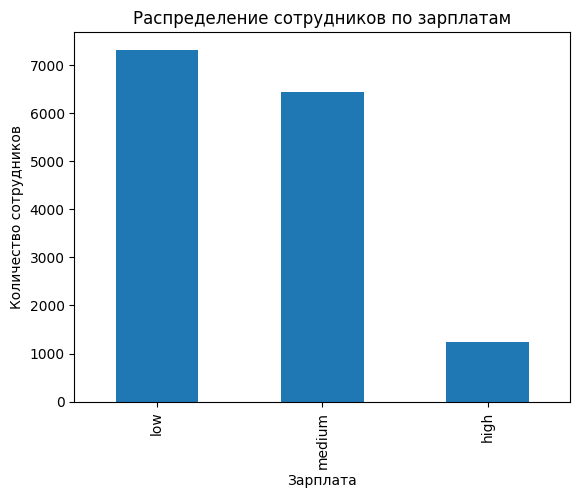

In [65]:
# df_dep_salary = df.groupby(df['department'])['salary'].agg(pd.Series.mode)
df['salary'].value_counts().plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

#Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

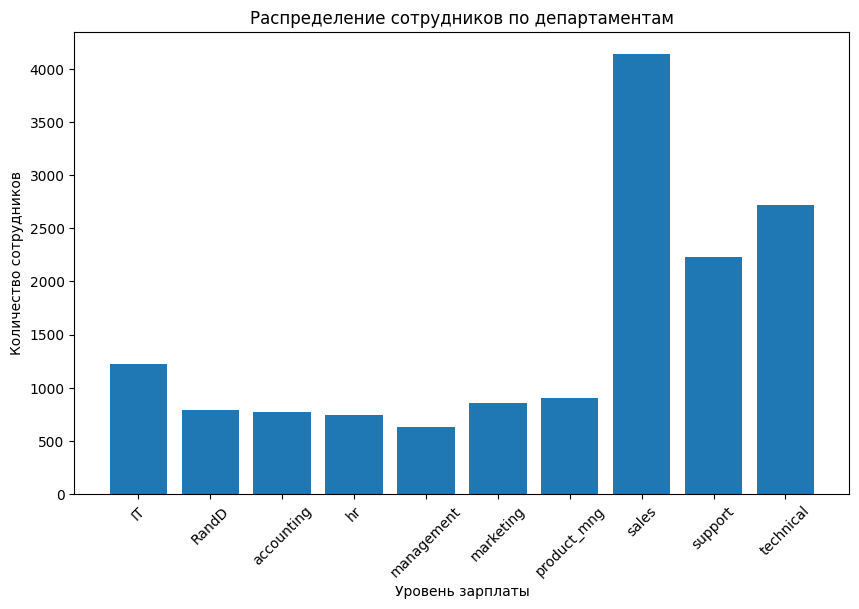

In [ ]:
df_dep_salary = df.groupby(df['department'])['salary'].count()
plt.figure(figsize=(10, 6))
plt.bar(df_dep_salary.index, df_dep_salary.values)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по департаментам')
plt.xticks(rotation=45)
plt.show()

#Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

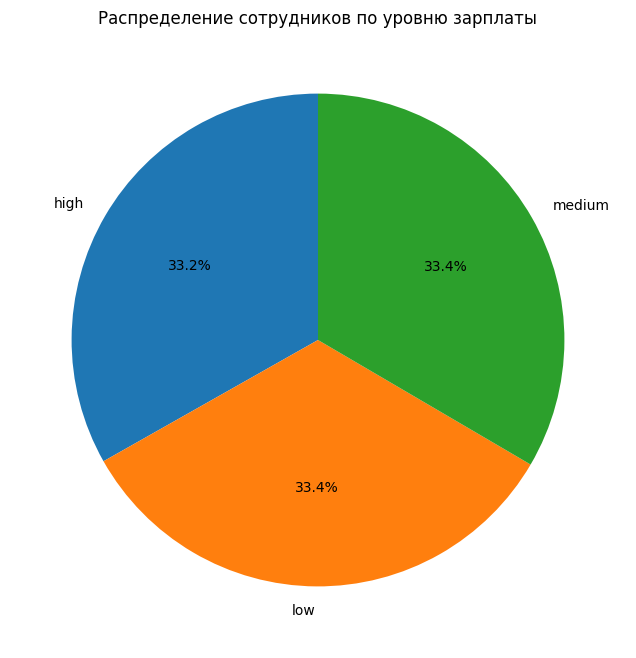

'\nОтсюда следует вывод, что количество времени, проведенного на работе, незначительно влияет на размер заработной платы.\n'

In [ ]:
average_hours = df.groupby('salary')['average_montly_hours'].mean()
plt.figure(figsize=(8, 8))
plt.pie(average_hours, labels=average_hours.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение сотрудников по уровню зарплаты')
plt.show()
"""
Отсюда следует вывод, что количество времени, проведенного на работе, незначительно влияет на размер заработной платы.
"""

# Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
1.   Доля сотрудников с повышением за последние 5 лет
2.   Средняя степень удовлетворенности
3.   Среднее количество проектов


In [33]:
list(df)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [61]:
# 1.1 Уволившиеся
# 1.1 Доля сотрудников с повышением за последние 5 лет
df_left = df[df['left'] == 1]
df_fired_5_years = df_left.groupby(df_left['promotion_last_5years'] == 1).count() / len(df_left) * 100
df_fired_5_years['promotion_last_5years']
"""
Отсюда следует, что почти все уволенные сотрудники не получили повышение за последние 5 лет.
Не очень хороший показатель для компании, если отталкиваться от моральных устоев :)
"""

promotion_last_5years
False    99.467936
True      0.532064
Name: promotion_last_5years, dtype: float64

In [60]:
# 1.2 Нынешние работники
# 1.2 Доля сотрудников с повышением за последние 5 лет
df_workers = df[df['left'] == 0]
df_5_years = df_workers.groupby(df_workers['promotion_last_5years'] == 1).count() / len(df_workers) * 100
df_5_years['promotion_last_5years']

promotion_last_5years
False    97.374869
True      2.625131
Name: promotion_last_5years, dtype: float64

In [50]:
# 2 Средняя степень удовлетворенности (для всех сотрудников)
avg_satisfaction = df.groupby('left')['satisfaction_level'].mean()
avg_satisfaction

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [63]:
# 3 Среднее количество проектов
avg_projects = df.groupby('left')['number_project'].mean()
avg_projects

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки
